# Data Augmentation Test 2
##### The data augmentation operations in this experiment involve a large number of parameters and data samples. Therefore, for the data augmentation effect of different parameters or methods, this study has done a large number of experiments to select the suitable methods and parameters for the purpose of the study.

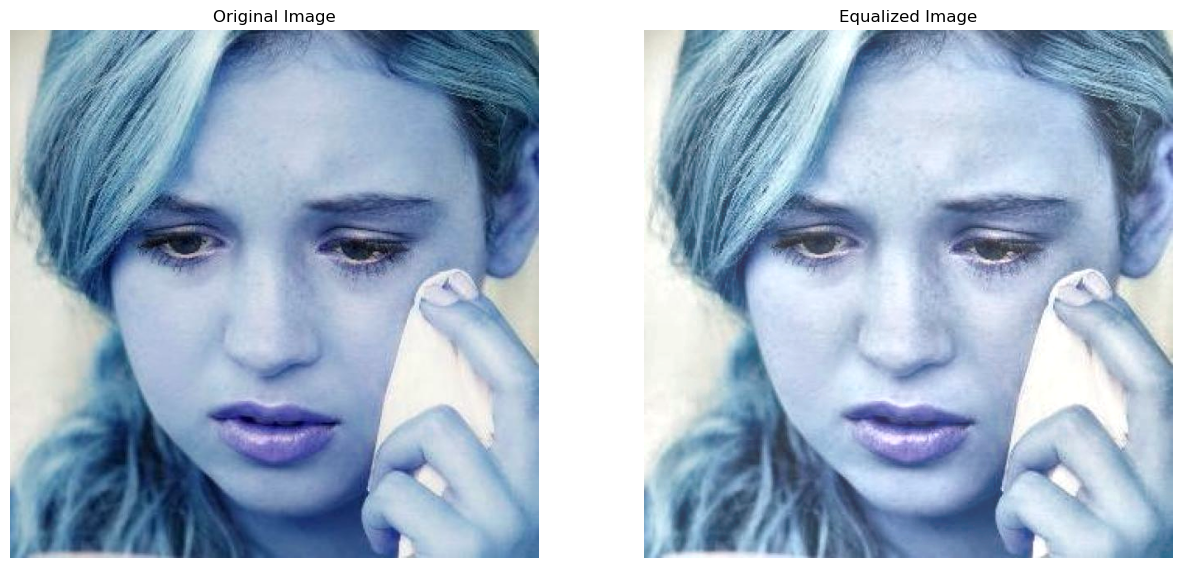

In [47]:
import cv2
import albumentations as A
from matplotlib import pyplot as plt

image = cv2.imread('/Users/piglet/Desktop/Project_Code/jupyter_notebook/Original Image.jpg')

transform = A.Compose([
    A.CLAHE(clip_limit=1.0, tile_grid_size=(8, 8), p=1.0),
    # A.Rotate(limit=(10), p=1),
    A.RandomBrightnessContrast(p=1),
])

augmented = transform(image=image)
clahe_image = augmented['image']

augmented = transform(image=image)
equalized_image = augmented['image']

plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')  

plt.subplot(122)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')  

plt.show()

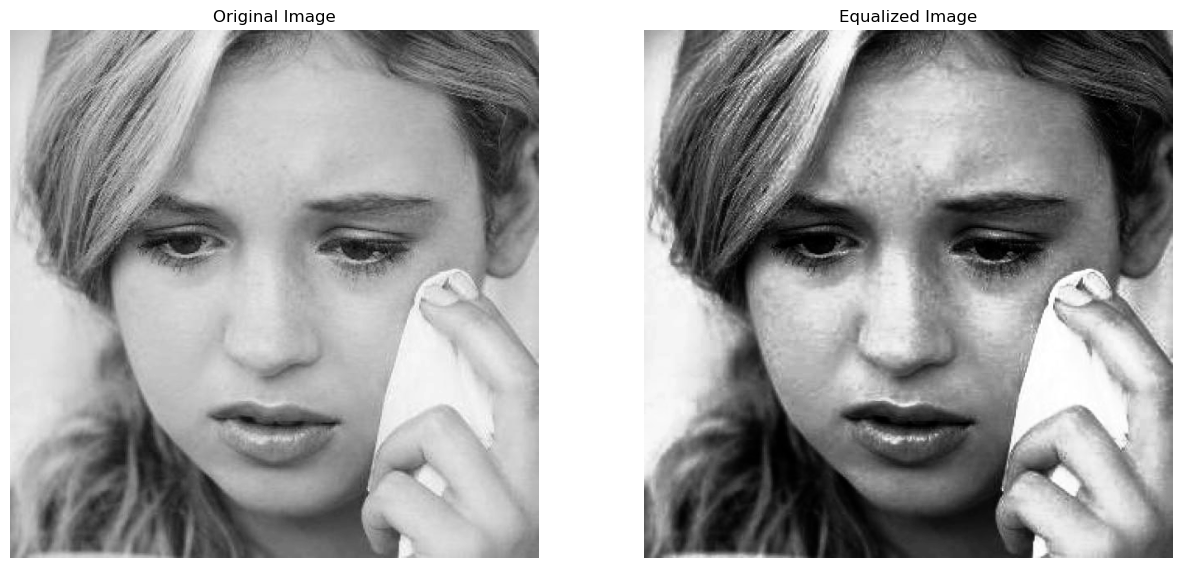

In [4]:
image = cv2.imread('/Users/piglet/Desktop/Project_Code/jupyter_notebook/Original Image.jpg', cv2.IMREAD_GRAYSCALE)


transform = A.Compose([
    A.Equalize(p=1.0)
])

augmented = transform(image=image)
equalized_image = augmented['image']

plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')  

plt.subplot(122)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')  

plt.show()

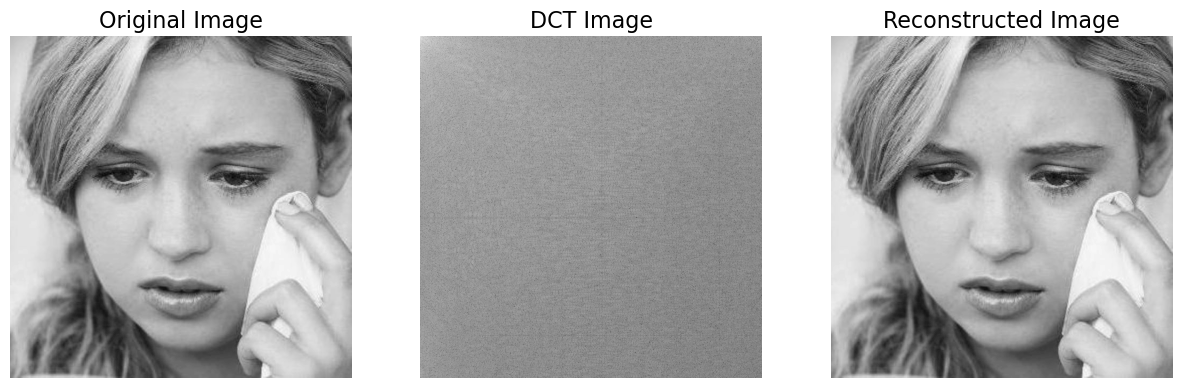

In [5]:
import numpy as np

image = cv2.imread('/Users/piglet/Desktop/Project_Code/jupyter_notebook/Original Image.jpg', cv2.IMREAD_GRAYSCALE)

dct_image = cv2.dct(np.float32(image))

idct_image = cv2.idct(dct_image)

plt.figure(figsize=(15, 7))  

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image', fontsize=16)
plt.axis('off')

plt.subplot(132)
plt.imshow(np.log(abs(dct_image)), cmap='gray')
plt.title('DCT Image', fontsize=16)
plt.axis('off') 

plt.subplot(133)
plt.imshow(idct_image, cmap='gray')
plt.title('Reconstructed Image', fontsize=16)
plt.axis('off') 

plt.show()


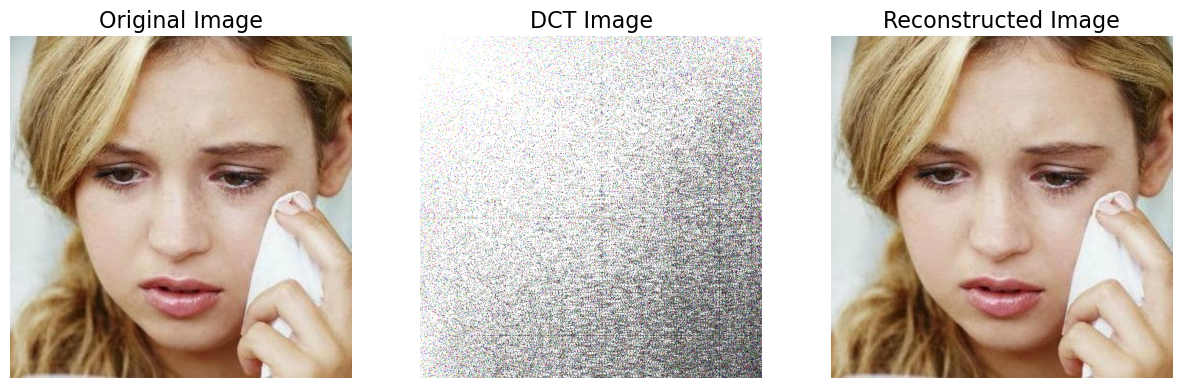

In [6]:
image = cv2.imread('/Users/piglet/Desktop/Project_Code/jupyter_notebook/Original Image.jpg')

b, g, r = cv2.split(image)

dct_b = cv2.dct(np.float32(b))
dct_g = cv2.dct(np.float32(g))
dct_r = cv2.dct(np.float32(r))

idct_b = cv2.idct(dct_b)
idct_g = cv2.idct(dct_g)
idct_r = cv2.idct(dct_r)

dct_image = cv2.merge([dct_b, dct_g, dct_r])
idct_image = cv2.merge([idct_b, idct_g, idct_r])

plt.figure(figsize=(15, 7))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image', fontsize=16)
plt.axis('off')

plt.subplot(132)
plt.imshow(np.log(np.abs(dct_image) + 1), cmap='gray') 
plt.title('DCT Image', fontsize=16)
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(np.uint8(idct_image), cv2.COLOR_BGR2RGB))
plt.title('Reconstructed Image', fontsize=16)
plt.axis('off')

plt.show()


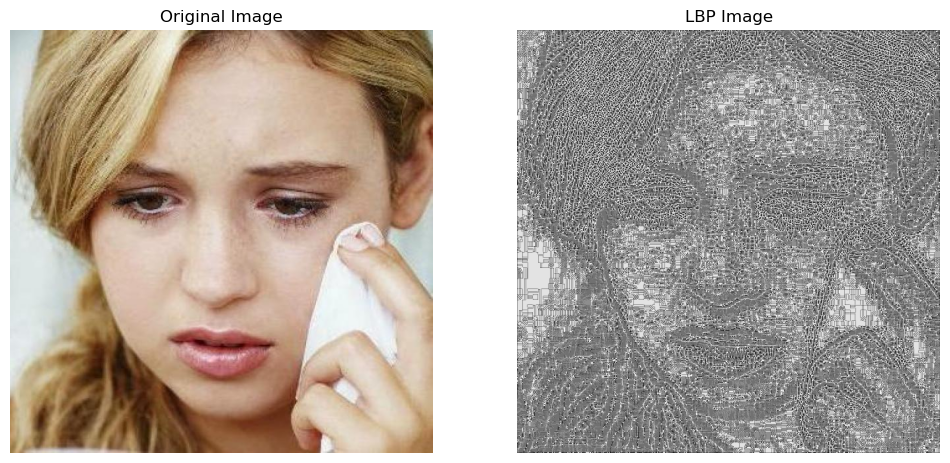

In [14]:
# LBP
from skimage.feature import local_binary_pattern

image_path = "/Users/piglet/Desktop/Project_Code/jupyter_notebook/Original Image.jpg"
color_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

radius = 1  
n_points = 8 * radius  

lbp_image = local_binary_pattern(gray_image, n_points, radius, method='uniform')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(lbp_image, cmap='gray')
ax[1].set_title('LBP Image')
ax[1].axis('off')

plt.show()
